<a href="https://colab.research.google.com/github/amaluvincent/Applied-data-science-/blob/main/img_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the drive module from google.colab to interact with Google Drive
from google.colab import drive

# Mount Google Drive to the '/content/drive' directory on the Colab environment
# This allows access to files stored in your Google Drive from within the Colab notebook
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import TensorFlow library for building and training machine learning models
import tensorflow as tf

# Import os module for interacting with the operating system
import os

# Import json module to work with JSON data
import json

# Import pandas library for data manipulation and analysis
import pandas as pd

# Import regular expressions (re) module for string operations and pattern matching
import re

# Import numpy library for numerical operations and array manipulation
import numpy as np

# Import time module to work with time-related functions
import time

# Import matplotlib.pyplot to create static, animated, and interactive visualizations in Python
import matplotlib.pyplot as matplib

# Import collections module to implement specialized container datatypes
import collections

# Import random module for generating random numbers
import random

# Import requests module for making HTTP requests
import requests

# Import json again (appears twice, probably a redundancy)
import json

# Import sqrt function from math module for mathematical computations
from math import sqrt

# Import Image class from PIL (Python Imaging Library) for image processing
from PIL import Image

# Import tqdm for displaying progress bars
from tqdm.auto import tqdm

# Import OpenCV library for computer vision tasks
import cv2

# Import warnings module to control warning messages
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [3]:
# Create a new directory named 'imgdataset' to store the image dataset
%mkdir 'imgdataset'

In [5]:
# Change the current working directory to 'imgdataset'
%cd 'imgdataset'

# Unzip the dataset stored in Google Drive into the 'imgdataset' directory
# The dataset is located at the specified path in Google Drive
!unzip '/content/RM_Segmentation_Assignment_dataset.zip'

[Errno 2] No such file or directory: 'imgdataset'
/content/imgdataset
Archive:  /content/RM_Segmentation_Assignment_dataset.zip
  inflating: test-30/000000001751.jpg  
  inflating: test-30/000000001380.jpg  
  inflating: test-30/000000001643.jpg  
  inflating: test-30/000000001583.jpg  
  inflating: test-30/000000001685.jpg  
  inflating: test-30/000000001482.jpg  
  inflating: test-30/000000001494.jpg  
  inflating: test-30/000000001551.jpg  
  inflating: test-30/000000001654.jpg  
  inflating: test-30/000000001594.jpg  
  inflating: test-30/000000001411.jpg  
  inflating: test-30/000000001459.jpg  
  inflating: test-30/000000001410.jpg  
  inflating: test-30/000000001717.jpg  
  inflating: test-30/000000001730.jpg  
  inflating: validation-300/labels.json  
  inflating: test-30/000000001385.jpg  
  inflating: train-300/labels.json   
  inflating: test-30/000000001492.jpg  
  inflating: test-30/000000001600.jpg  
  inflating: test-30/000000001657.jpg  
  inflating: test-30/00000000167

# Save train data

In [6]:
import json
import pandas as pd

# Open and read the labels.json file from the specified path
with open('/content/imgdataset/train-300/labels.json', 'r') as f:
    data = json.load(f)

# Create a dictionary to map image IDs to their corresponding file names
imageIdToFile = {img['id']: img['file_name'] for img in data['images']}

# Create a dictionary to map category IDs to their corresponding category names
categoryIdToName = {cat['id']: cat['name'] for cat in data['categories']}

# Process the annotations to generate pairs of image IDs, file names, and category names
imgCapPairs = []
for annotation in data['annotations']:
    img_id = annotation['image_id']
    category_id = annotation['category_id']
    img_name = imageIdToFile[img_id]
    category_name = categoryIdToName[category_id]
    imgCapPairs.append([img_id, img_name, category_name])

# Create a DataFrame from the list of image-caption pairs
trainDataFrame = pd.DataFrame(imgCapPairs, columns=['img_id', 'images', 'categories'])

# Adjust the 'images' column to include the correct path for each image
trainDataFrame['images'] = trainDataFrame['images'].apply(lambda x: f'{x}')

In [7]:
# Filter the DataFrame to include only rows where the 'categories' column contains 'dog', 'car', 'person', or 'cake'
dataFrame = trainDataFrame[trainDataFrame['categories'].isin(['dog', 'car', 'person', 'cake'])]


In [8]:
dataFrame

img_id            images categories
0          1  000000000149.jpg     person
1          1  000000000149.jpg     person
2          1  000000000149.jpg     person
3          1  000000000149.jpg     person
8          1  000000000149.jpg     person
...      ...               ...        ...
3860     300  000000003983.jpg     person
3861     300  000000003983.jpg     person
3862     300  000000003983.jpg     person
3866     300  000000003983.jpg     person
3869     300  000000003983.jpg     person

[2438 rows x 3 columns]

In [9]:
# Count the number of occurrences of each category in the 'categories' column and display the results
dataFrame['categories'].value_counts()

categories
person    1350
car       1061
dog         14
cake        13
Name: count, dtype: int64

In [10]:
from PIL import Image
import os
import pandas as pd

# Display the first few rows of the DataFrame and its columns to verify its structure
print(dataFrame.head())
print(dataFrame.columns)

# Extract the filenames of the images and their corresponding labels
imageFileNames = dataFrame['images']
labels = dataFrame['categories']

# Define the path to the directory where the images are stored
imageDir = '/content/imgdataset/train-300/data'
# Define the path to the directory where the labeled images will be saved
output_dir = '/content/filteredData/train'

# Create the output directory if it doesn't already exist
os.makedirs(output_dir, exist_ok=True)

# Loop through each image filename and its associated label
for i in range(len(imageFileNames)):
    filename = imageFileNames.iloc[i]
    label = labels.iloc[i]

    # Construct the full path to the image file
    image_path = os.path.join(imageDir, filename)

    # Try to open the image file; if not found, print a message and skip to the next iteration
    try:
        image = Image.open(image_path)
    except FileNotFoundError:
        print(f"Image {filename} not found in {imageDir}. Skipping.")
        continue

    # Create a directory for the label if it doesn't already exist
    label_dir = os.path.join(output_dir, label)
    os.makedirs(label_dir, exist_ok=True)

    # Save the image in the directory corresponding to its label
    save_path = os.path.join(label_dir, filename)
    image.save(save_path)

    print(f"Image {filename} saved in folder {label}.")

print("All images processed and saved in labeled folders.")


   img_id            images categories
0       1  000000000149.jpg     person
1       1  000000000149.jpg     person
2       1  000000000149.jpg     person
3       1  000000000149.jpg     person
8       1  000000000149.jpg     person
Index(['img_id', 'images', 'categories'], dtype='object')
Image 000000000149.jpg saved in folder person.
Image 000000000149.jpg saved in folder person.
Image 000000000149.jpg saved in folder person.
Image 000000000149.jpg saved in folder person.
Image 000000000149.jpg saved in folder person.
Image 000000000149.jpg saved in folder person.
Image 000000000149.jpg saved in folder car.
Image 000000000149.jpg saved in folder car.
Image 000000000149.jpg saved in folder car.
Image 000000000149.jpg saved in folder car.
Image 000000000149.jpg saved in folder person.
Image 000000000149.jpg saved in folder person.
Image 000000000149.jpg saved in folder person.
Image 000000000149.jpg saved in folder person.
Image 000000000149.jpg saved in folder person.
Image 000000000

#Save Validation data

In [11]:
# Define a base path for the directory
BASE_PATH = ''

# Open and read the labels.json file from the specified validation dataset path
with open('/content/imgdataset/validation-300/labels.json', 'r') as f:
    data = json.load(f)

# Create a dictionary to map image IDs to their respective file names
imageIdToFile = {img['id']: img['file_name'] for img in data['images']}

# Create a dictionary to map category IDs to their respective category names
categoryIdToName = {cat['id']: cat['name'] for cat in data['categories']}

# Process the annotations to generate pairs of image IDs, file names, and category names
imgCapPairs = []
for annotation in data['annotations']:
    img_id = annotation['image_id']
    category_id = annotation['category_id']
    img_name = imageIdToFile[img_id]
    category_name = categoryIdToName[category_id]
    imgCapPairs.append([img_id, img_name, category_name])

# Create a DataFrame from the list of image-caption pairs
val_dataFrame = pd.DataFrame(imgCapPairs, columns=['img_id', 'images', 'categories'])

# Adjust the 'images' column to include the correct path for each image
val_dataFrame['images'] = val_dataFrame['images'].apply(lambda x: f'{x}')


In [12]:
# Filter the DataFrame to include only rows where the 'categories' column contains 'dog', 'car', 'person', or 'cake'
DataFrame1 = val_dataFrame[val_dataFrame['categories'].isin(['dog', 'car', 'person', 'cake'])]


In [13]:
from PIL import Image
import os
import pandas as pd

# Verify the structure of the DataFrame by printing the first few rows and its columns
print(dataFrame.head())
print(dataFrame.columns)

# Extract the filenames of the filtered images and their corresponding labels
imageFileNames = DataFrame1['images']
labels = DataFrame1['categories']

# Define the path to the directory where the images are stored
imageDir = '/content/imgdataset/validation-300/data'
# Define the path to the directory where the labeled images will be saved
output_dir = '/content/filteredData/validation'

# Create the output directory if it doesn't already exist
os.makedirs(output_dir, exist_ok=True)

# Loop through each image filename and its associated label
for i in range(len(imageFileNames)):
    filename = imageFileNames.iloc[i]
    label = labels.iloc[i]

    # Construct the full path to the image file
    imagePath = os.path.join(imageDir, filename)

    # Try to open the image file; if not found, print a message and skip to the next iteration
    try:
        image = Image.open(imagePath)
    except FileNotFoundError:
        print(f"Image {filename} not found in {imageDir}. Skipping.")
        continue

    # Create a directory for the label if it doesn't already exist
    label_dir = os.path.join(output_dir, label)
    os.makedirs(label_dir, exist_ok=True)

    # Save the image in the directory corresponding to its label
    save_path = os.path.join(label_dir, filename)
    image.save(save_path)

    print(f"Image {filename} saved in folder {label}.")

print("All images processed and saved in labeled folders.")


   img_id            images categories
0       1  000000000149.jpg     person
1       1  000000000149.jpg     person
2       1  000000000149.jpg     person
3       1  000000000149.jpg     person
8       1  000000000149.jpg     person
Index(['img_id', 'images', 'categories'], dtype='object')
Image 000000000724.jpg saved in folder car.
Image 000000001532.jpg saved in folder car.
Image 000000001532.jpg saved in folder car.
Image 000000001532.jpg saved in folder car.
Image 000000001532.jpg saved in folder car.
Image 000000001532.jpg saved in folder car.
Image 000000001532.jpg saved in folder car.
Image 000000001532.jpg saved in folder car.
Image 000000001584.jpg saved in folder person.
Image 000000001584.jpg saved in folder person.
Image 000000001584.jpg saved in folder person.
Image 000000001584.jpg saved in folder person.
Image 000000001584.jpg saved in folder person.
Image 000000001584.jpg saved in folder person.
Image 000000001584.jpg saved in folder person.
Image 000000001584.jpg save

In [14]:
# Import the glob module to match file paths
import glob
import random

# Use glob to retrieve a list of all file paths in the filteredData directory
rmImgData = glob.glob('/content/filteredData/**/**/**')

# Shuffle the combined list to introduce randomness
random.shuffle(rmImgData)

# Display the shuffled list of file paths
rmImgData


['/content/filteredData/train/person/000000015409.jpg',
 '/content/filteredData/train/person/000000014757.jpg',
 '/content/filteredData/train/person/000000000110.jpg',
 '/content/filteredData/train/person/000000002782.jpg',
 '/content/filteredData/train/person/000000001762.jpg',
 '/content/filteredData/validation/car/000000057597.jpg',
 '/content/filteredData/train/person/000000006233.jpg',
 '/content/filteredData/train/car/000000016346.jpg',
 '/content/filteredData/train/person/000000010056.jpg',
 '/content/filteredData/validation/car/000000032334.jpg',
 '/content/filteredData/validation/car/000000258793.jpg',
 '/content/filteredData/validation/car/000000244379.jpg',
 '/content/filteredData/train/person/000000013489.jpg',
 '/content/filteredData/train/person/000000013082.jpg',
 '/content/filteredData/train/car/000000008834.jpg',
 '/content/filteredData/train/person/000000013258.jpg',
 '/content/filteredData/validation/person/000000254814.jpg',
 '/content/filteredData/validation/person

In [15]:
# Display-total-number-images-in-the-dataset
print("Total number of images : ", len(rmImgData))

Total number of images :  1040


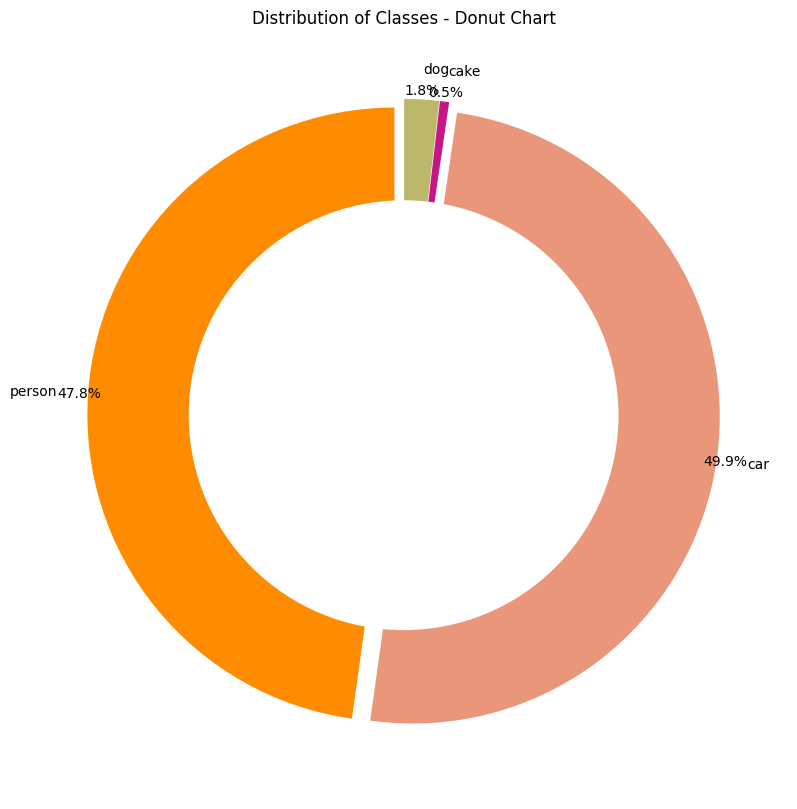

In [16]:
import matplotlib.pyplot as matplib
import collections

# Extract class labels from file paths and count occurrences
labels = []
for img_path in rmImgData:
    label = img_path.split('/')[-2]  # Extract label from file path
    labels.append(label)

# Define colors for each class
colors = ['DarkOrange', 'DarkSalmon', 'MediumVioletRed', 'DarkKhaki']

# Count occurrences of each class
class_counts = collections.Counter(labels)

# Create an array to slightly explode each slice for better visualization
explode = [0.03] * len(class_counts)

# Create a figure and subplot for the donut chart
matplib.figure(figsize=(16, 8))
matplib.subplot(1, 2, 1)  # 1 row, 2 columns, position 1

# Draw the donut chart
matplib.pie(class_counts.values(), labels=class_counts.keys(), autopct="%1.1f%%", colors=colors, startangle=90, pctdistance=1.03, explode=explode)
centre_circle = matplib.Circle((0,0),0.70,fc='white')  # Draw a white circle at the center
fig = matplib.gcf()
fig.gca().add_artist(centre_circle)

# Add title to the chart
matplib.title("Distribution of Classes - Donut Chart")

# Adjust layout to prevent overlapping
matplib.tight_layout()

# Display the chart
matplib.show()


### **Image Counts**

In [17]:
# Initialize an empty dictionary to keep track of categories and their counts
categories = {}

# Iterate over each file path in rmImgData
for path in rmImgData:
    # Extract the category from the path
    category = path.split('/')[-2]
    # Increment the count for the category
    if category not in categories:
        categories[category] = 1
    else:
        categories[category] += 1

# Create a DataFrame from the dictionary
dataFrame = pd.DataFrame.from_dict(categories, orient='index', columns=['Count'])

# Display the DataFrame
dataFrame


Count
person    497
car       519
cake        5
dog        19

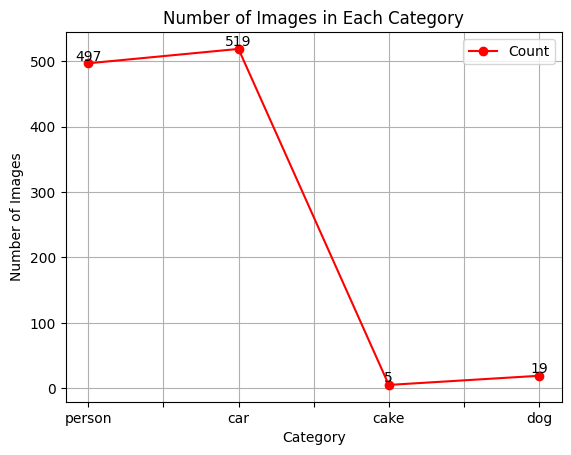

In [18]:
import matplotlib.pyplot as matplib

# Plotting the line plot
ax = dataFrame.plot.line(color='red', marker='o', linestyle='-')

# Labeling the x-axis and y-axis
matplib.xlabel('Category')
matplib.ylabel('Number of Images')

# Adding a title to the plot
matplib.title('Number of Images in Each Category')

# Adding count annotations to each point on the line plot
for index, value in enumerate(dataFrame.values.flatten()):
    ax.text(index, value, str(value), ha="center", va="bottom")

# Adding gridlines for better readability
matplib.grid(True)

# Display the plot
matplib.show()


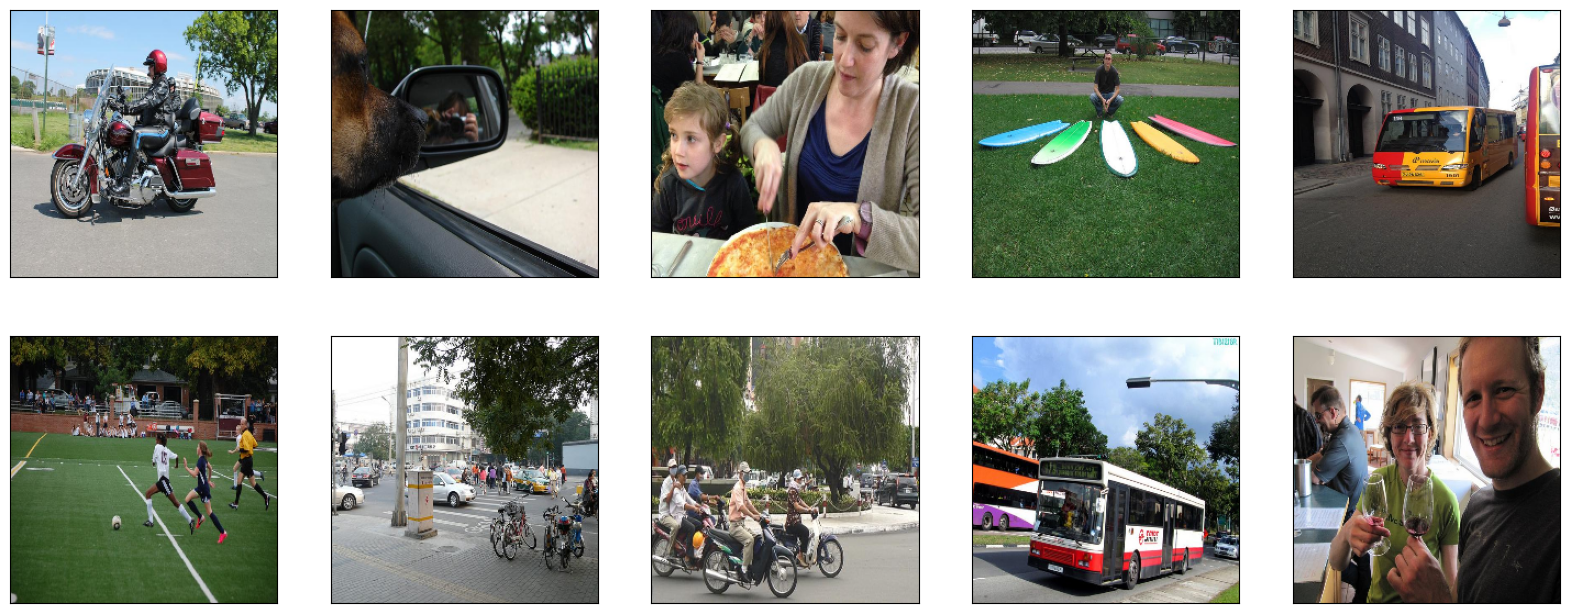

In [19]:
# Set the figure size for the entire subplot grid
matplib.figure(figsize=(20, 12))

# Iterate through the first 10 images in rmImgData
for i in range(10):
    # Create subplots in a 3x5 grid
    matplib.subplot(3, 5, i + 1)

    # Read and load the image using OpenCV
    img = cv2.imread(rmImgData[i])

    # Transform the image from BGR to RGB color space
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize the image to 244x244 pixels
    img = cv2.resize(img, (244, 244))

    # Display the image in the subplot
    matplib.imshow(img)

    # Remove x and y axis labels for cleaner visualization
    matplib.xticks([])
    matplib.yticks([])


### **Convert the images to pixels**

In [20]:
# Define a function to convert images to pixels
def convert_to_pixels(imagePath):
    # Load the image using Keras preprocessing and resize it to (224, 224)
    img = tf.keras.preprocessing.image.load_img(imagePath, target_size=(224, 224))

    # Convert the image into a NumPy array
    x = tf.keras.preprocessing.image.img_to_array(img)

    # Add an extra dimension to match the model's input shape
    x = np.expand_dims(x, axis=0)

    return x

# Convert all images to pixels and concatenate them into a single NumPy array
rmseg_img_pixels = np.concatenate([convert_to_pixels(imagePath) for imagePath in rmImgData])


In [21]:
# Create empty lists to store images and corresponding labels
rmImgList = []  # List to store images
rmLabelsList = []  # List to store corresponding labels

# Iterate through the indices using tqdm for progress tracking
for i in tqdm(range(len(rmImgData))):
    # Read the image using OpenCV, convert color space, and resize it
    img = cv2.imread(rmImgData[i])  # Read the image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert color space from BGR to RGB
    img = cv2.resize(img, (196, 196))  # Resize the image

    # Append the preprocessed image to the list of images
    rmImgList.append(img)

    # Map categories to numerical labels and append to the list of labels
    # Extract the category from the file path
    category = rmImgData[i].split(os.path.sep)[-2]

    # Map categories to numerical labels
    if category == "person":
        label = 0
    elif category == "car":
        label = 1
    elif category == "dog":
        label = 2
    elif category == "cake":
        label = 3

    # Append the numerical label to the list of labels
    rmLabelsList.append(label)


  0%|          | 0/1040 [00:00<?, ?it/s]

In [22]:
import numpy as np

# Convert the list of images to a NumPy array
rmImgList = np.array(rmImgList)

# Convert the list of labels to a NumPy array
rmLabelsList = np.array(rmLabelsList)


In [23]:
rmImgList.shape

(1040, 196, 196, 3)

In [24]:
rmLabelsList.shape

(1040,)

In [25]:
# Import the train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# trainXData: Training data features
# testXData: Testing data features
# trainYData: Training data labels
# testYData: Testing data labels
trainXData, testXData, trainYData, testYData = train_test_split(rmImgList, rmLabelsList, test_size=0.5)


In [26]:
# Import the to_categorical function from tensorflow.keras.utils for one-hot encoding
from tensorflow.keras.utils import to_categorical

# Convert the labels to categorical format using one-hot encoding
trainYData = to_categorical(trainYData, 4)  # 4 classes: 'person', 'car', 'dog', 'cake'
testYData = to_categorical(testYData, 4)


In [27]:
# Print the shapes of the training set for input data
print('Shape of training input data:', trainXData.shape)

# Print the shapes of the training set for output labels
print('Shape of training output labels:', trainYData.shape)

# Print the shapes of the testing set for input data
print('Shape of testing input data:', testXData.shape)

# Print the shapes of the testing set for output labels
print('Shape of testing output labels:', testYData.shape)


Shape of training input data: (520, 196, 196, 3)
Shape of training output labels: (520, 4)
Shape of testing input data: (520, 196, 196, 3)
Shape of testing output labels: (520, 4)


# **Implementation of mobileNetModel Model**

In [28]:
# Import necessary layers from TensorFlow Keras
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Import MobileNet model from TensorFlow Keras applications
from tensorflow.keras.applications import MobileNet

# Import ModelCheckpoint callback for saving the best model during training
from tensorflow.keras.callbacks import ModelCheckpoint

# Import Adam optimizer from Keras
from keras.optimizers import Adam


In [29]:
# Load MobileNet model pre-trained on ImageNet and exclude top layers
mobileNetModel = MobileNet(include_top=False, weights="imagenet", input_shape=(196, 196, 3))

# Set the MobileNet model to be non-trainable
mobileNetModel.trainable = False

17225924/17225924 [==============================] - 0s 0us/step


In [30]:
# Add global average pooling layer to reduce dimensionality
x = mobileNetModel.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Add a fully connected layer with 512 units and ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)

# Add batch normalization layer to stabilize and accelerate training
x = tf.keras.layers.BatchNormalization()(x)

# Add dropout layer for regularization to prevent overfitting
x = tf.keras.layers.Dropout(0.5)(x)

# Add another fully connected layer with 256 units and ReLU activation
x = tf.keras.layers.Dense(256, activation='relu')(x)

# Add fully connected layer with 4 outputs for 4 classes and softmax activation for probability distribution
x = tf.keras.layers.Dense(4, activation='softmax')(x)


In [31]:
# Create the model by specifying input and output layers
mobileNetModel = tf.keras.models.Model(inputs=mobileNetModel.input, outputs=x)

# Print the summary of the model architecture
mobileNetModel.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 196, 196, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 98, 98, 32)        864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 98, 98, 32)        128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 98, 98, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 98, 98, 32)        288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 98, 98, 32)        128   

In [32]:
# Set hyperparameters for training
lr = 0.0001  # Learning rate
epochs = 20  # Number of training epochs
batch_size = 32  # Batch size for training
ls_fun = 'categorical_crossentropy'  # Loss function for categorical classification

In [33]:
# Build the model using the given loss, optimizer, and metrics
mobileNetModel.compile(
    loss=ls_fun,  # Categorical cross-entropy loss function for multiclass classification
    optimizer=Adam(learning_rate=lr),  # Adam optimizer with specified learning rate
    metrics=['accuracy']  # Monitor accuracy during training
)


In [34]:
# Train the model and preserve the training records
history_model = mobileNetModel.fit(
    trainXData,  # Training features
    trainYData,  # Training labels
    epochs=epochs,  # Number of training epochs
    batch_size=batch_size,  # Batch size for training
    validation_data=(testXData, testYData)  # Validation data for monitoring performance during training
)


Epoch 1/20
17/17 [==============================] - 10s 139ms/step - loss: 1.4465 - accuracy: 0.4038 - val_loss: 1.3460 - val_accuracy: 0.3038
Epoch 2/20
17/17 [==============================] - 1s 54ms/step - loss: 1.2479 - accuracy: 0.4269 - val_loss: 1.2982 - val_accuracy: 0.3154
Epoch 3/20
17/17 [==============================] - 1s 52ms/step - loss: 1.0488 - accuracy: 0.5096 - val_loss: 1.2561 - val_accuracy: 0.3538
Epoch 4/20
17/17 [==============================] - 1s 67ms/step - loss: 0.9959 - accuracy: 0.5346 - val_loss: 1.1745 - val_accuracy: 0.3923
Epoch 5/20
17/17 [==============================] - 1s 50ms/step - loss: 0.8867 - accuracy: 0.5885 - val_loss: 1.1368 - val_accuracy: 0.3904
Epoch 6/20
17/17 [==============================] - 1s 49ms/step - loss: 0.8378 - accuracy: 0.6096 - val_loss: 1.1108 - val_accuracy: 0.3846
Epoch 7/20
17/17 [==============================] - 1s 66ms/step - loss: 0.8453 - accuracy: 0.6000 - val_loss: 1.0934 - val_accuracy: 0.3750
Epoch 8/20


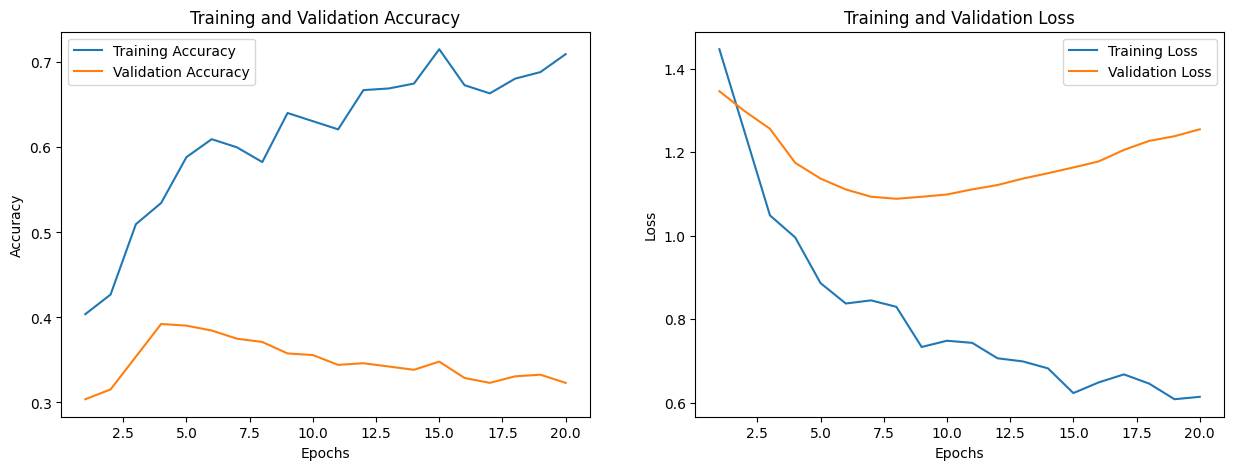

In [35]:
# Get the training and validation accuracy and loss values from the history object
acc = history_model.history['accuracy']
val_acc = history_model.history['val_accuracy']
loss = history_model.history['loss']
val_loss = history_model.history['val_loss']

# Define the number of epochs
epochs = range(1, len(acc) + 1)

# Create a figure with two subplots
fig, (ax1, ax2) = matplib.subplots(1, 2, figsize=(15, 5))

# Plot the training and validation accuracy on the first subplot
ax1.plot(epochs, acc, label='Training Accuracy')
ax1.plot(epochs, val_acc, label='Validation Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot the training and validation loss on the second subplot
ax2.plot(epochs, loss, label='Training Loss')
ax2.plot(epochs, val_loss, label='Validation Loss')
ax2.set_title('Training and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

# Show the plot
matplib.show()


### **Model Training Evaluation**

In [36]:
# Calculate accuracy, recall, precision, and F1-score of training data
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Make predictions on the training data
yPred = mobileNetModel.predict(trainXData)
yPred = np.argmax(yPred, axis=1)
yTrue = np.argmax(trainYData, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(yTrue, yPred)  # Accuracy
recall = recall_score(yTrue, yPred, average='macro')  # Recall
precision = precision_score(yTrue, yPred, average='macro')  # Precision
f1_score = f1_score(yTrue, yPred, average='macro')  # F1-score

# Print evaluation metrics
print("Training Accuracy:", accuracy)
print("Training Recall:", recall)
print("Training Precision:", precision)
print("Training F1 Score:", f1_score)


17/17 [==============================] - 1s 27ms/step
Training Accuracy: 0.7615384615384615
Training Recall: 0.7502422180993609
Training Precision: 0.7015350877192983
Training F1 Score: 0.7227413603060365


In [39]:
# Import classification_report from sklearn.metrics
from sklearn.metrics import classification_report
# Unique classes in yTrue and yPred
unique_classes = list(set(yTrue).union(set(yPred)))
# Generate classification report
clsReport = classification_report(yTrue, yPred, target_names=['person', 'car', 'dog', 'cake'],labels=unique_classes)

# Print classification report
print(clsReport)


              precision    recall  f1-score   support

      person       0.76      0.75      0.75       245
         car       0.77      0.78      0.77       264
         dog       0.57      0.73      0.64        11

    accuracy                           0.76       520
   macro avg       0.70      0.75      0.72       520
weighted avg       0.76      0.76      0.76       520



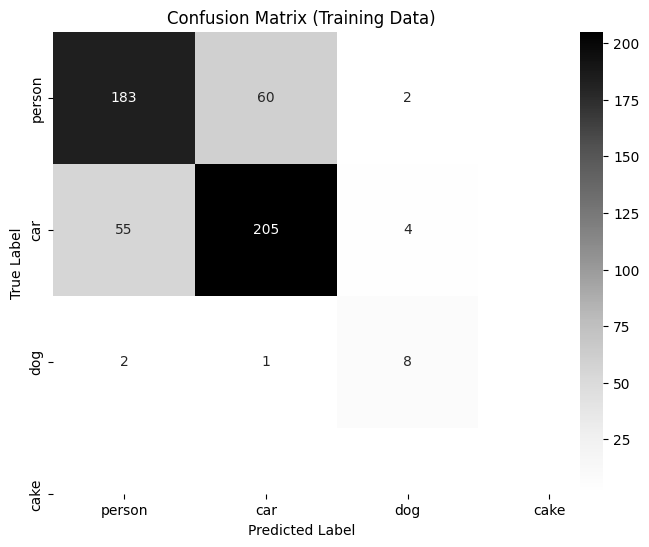

In [40]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as matplib
import seaborn as sns

# Create a confusion matrix
cmtt = confusion_matrix(yTrue, yPred)

# Define class labels
classLabels = ['person', 'car', 'dog', 'cake']

# Plot the confusion matrix
matplib.figure(figsize=(8, 6))
sns.heatmap(cmtt, annot=True, fmt="d", cmap="Greys", xticklabels=classLabels, yticklabels=classLabels)
matplib.xlabel("Predicted Label")
matplib.ylabel("True Label")
matplib.title("Confusion Matrix (Training Data)")
matplib.show()


17/17 [==============================] - 0s 26ms/step


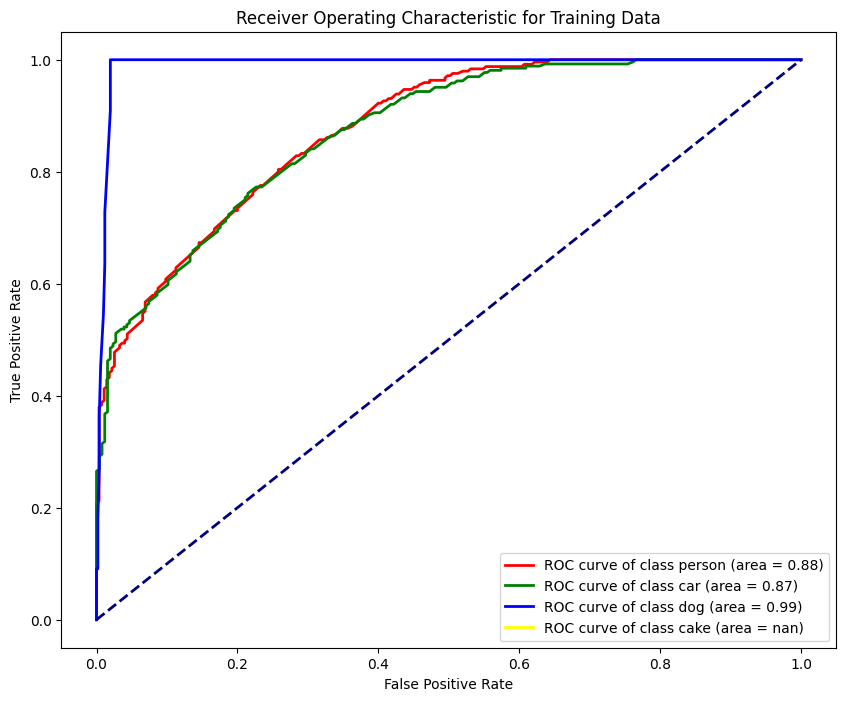

In [41]:
# Import necessary libraries
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for each class
yPredProb = mobileNetModel.predict(trainXData)

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
rocAuc = dict()
nClasses = 4
for i in range(nClasses):
    fpr[i], tpr[i], _ = roc_curve(trainYData[:, i], yPredProb[:, i])
    rocAuc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
colors = ['red', 'green', 'blue', 'yellow']
lw = 2
matplib.figure(figsize=(10, 8))
for i, color in zip(range(nClasses), colors):
    matplib.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'.format(classLabels[i], rocAuc[i]))

# Plot the diagonal line
matplib.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

# Set labels and title
matplib.xlabel('False Positive Rate')
matplib.ylabel('True Positive Rate')
matplib.title('Receiver Operating Characteristic for Training Data')
matplib.legend(loc="lower right")
matplib.show()


### **Model Testing Evaluate**

In [42]:
# Use the test data set to assess the loaded model and obtain validation accuracy
valAccuracyRm = mobileNetModel.evaluate(testXData, testYData, verbose=1)


17/17 [==============================] - 0s 27ms/step - loss: 1.2549 - accuracy: 0.3231


In [43]:
# Predict using the trained model and the test set of data
testPredRm = mobileNetModel.predict(testXData)

# Extract the predicted labels by taking the index of the maximum value in each prediction array
yPredTestRm = np.argmax(testPredRm, axis=1)

# Extract the true labels by taking the index of the maximum value in each true label array
yTrueTestRm = np.argmax(testYData, axis=1)


17/17 [==============================] - 0s 26ms/step


In [44]:
# Import necessary metrics for assessing categorization models
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Import necessary functions for precision-recall curve analysis
from sklearn.metrics import precision_recall_curve, auc

# Import necessary functions for ROC curve analysis
from sklearn.metrics import roc_curve, auc


In [45]:
# Calculate precision score of the trained model
precisionTestRm = precision_score(yTrueTestRm, yPredTestRm, average='weighted')

# Calculate recall score of the trained model
recallTestRm = recall_score(yTrueTestRm, yPredTestRm, average='weighted')

# Calculate F1 score of the trained model
f1TestRm = f1_score(yTrueTestRm, yPredTestRm, average='weighted')


In [46]:
# Output the accuracy of the model on the test set
print("Testing Accuracy  : %.4f" % valAccuracyRm[1])

# Print the precision score of the trained model
print("Precision Score   : %.4f" % precisionTestRm)

# Output the recall score of the trained model
print("Recall Score      : %.4f" % recallTestRm)

# Print the F1 score of the trained model
print("F1 Score          : %.4f" % f1TestRm)


Testing Accuracy  : 0.3231
Precision Score   : 0.3193
Recall Score      : 0.3231
F1 Score          : 0.3212


### **Classification Report**

In [47]:
# Create a list of labels
labels = ['car', 'person', 'dog', 'cake']


In [48]:
# Generate and print the classification report of the model
print(classification_report(yTrueTestRm, yPredTestRm, target_names=labels))


              precision    recall  f1-score   support

         car       0.32      0.33      0.32       252
      person       0.33      0.34      0.33       255
         dog       0.00      0.00      0.00         8
        cake       0.00      0.00      0.00         5

    accuracy                           0.32       520
   macro avg       0.16      0.17      0.16       520
weighted avg       0.32      0.32      0.32       520



### **Confusion Matrix**

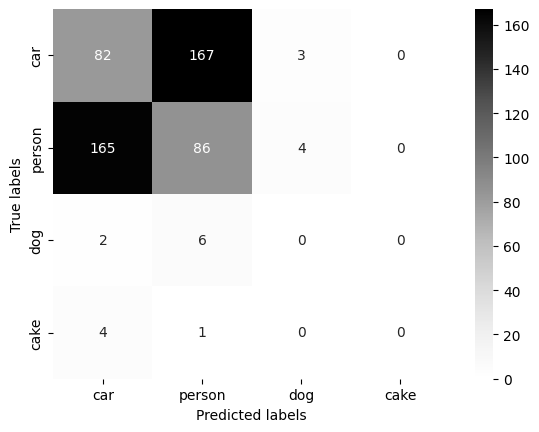

In [49]:
# Import necessary libraries
import matplotlib.pyplot as matplib
import seaborn as sns

# Generate the confusion matrix
cmTest = confusion_matrix(yTrueTestRm, yPredTestRm)

# Set up the plot
ax = matplib.subplot()

# Plot the confusion matrix using seaborn with annotations
sns.heatmap(cmTest, annot=True, ax=ax, cmap='Greys',fmt='d')

# Set labels for the axes
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

# Set tick labels for x and y axes
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# Show the plot
matplib.show()


### **ROC-AUC Curve**

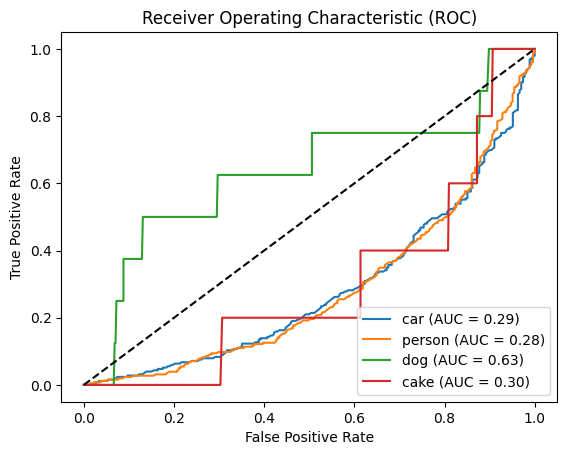

In [50]:
# Import necessary library
import matplotlib.pyplot as matplib

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
rocAuc = dict()
for i in range(len(labels)):
    fpr[i], tpr[i], _ = roc_curve(testYData[:, i], testPredRm[:, i])
    rocAuc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
matplib.figure()
for i in range(len(labels)):
    matplib.plot(fpr[i], tpr[i], label=f"{labels[i]} (AUC = {rocAuc[i]:.2f})")

# Plot the diagonal line
matplib.plot([0, 1], [0, 1], 'k--')

# Set labels and title
matplib.xlabel('False Positive Rate')
matplib.ylabel('True Positive Rate')
matplib.title('Receiver Operating Characteristic (ROC)')
matplib.legend(loc="lower right")
matplib.show()


### **Image Segmentation**

In [51]:
def data_prepare(imagePath):
    """
    Prepare image data for model input.

    Args:
    - imagePath (str): Path to the image file.

    Returns:
    - img (numpy.ndarray): Preprocessed image data.
    """

    # Read the image using OpenCV
    img = cv2.imread(imagePath)

    # Convert the color space from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize the image to the required input size of the model (224x224)
    img = cv2.resize(img, (224, 224))

    return img


In [52]:
import os
import cv2
import torch
import torchvision
from pathlib import Path
from tqdm import tqdm
from torchvision.transforms import functional as F

# Load a pre-trained DeepLabV3 model
segmentation_model = torchvision.models.segmentation.fcn_resnet50(pretrained=True)
segmentation_model.eval()

# Device configuration
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
segmentation_model.to(device)

# Function to apply segmentation
def get_segmentation_mask(image):
    """
    Apply semantic segmentation to an input image.

    Args:
    - image (PIL.Image): Input image.

    Returns:
    - masks (numpy.ndarray): Segmentation mask.
    """
    # Convert the image to a PyTorch tensor and move to the appropriate device
    image_tensor = F.to_tensor(image).unsqueeze(0).to(device)

    # Perform segmentation prediction
    with torch.no_grad():
        prediction = segmentation_model(image_tensor)['out']

    # Extract the segmentation mask from the prediction
    masks = prediction.squeeze(0).argmax(0).byte().cpu().numpy()

    return masks


Downloading: "https://download.pytorch.org/models/fcn_resnet50_coco-1167a1af.pth" to /root/.cache/torch/hub/checkpoints/fcn_resnet50_coco-1167a1af.pth
100%|██████████| 135M/135M [00:01<00:00, 107MB/s]


Enter the path to image 1: /content/imgdataset/test-30/000000001773.jpg
Enter the path to image 2: /content/imgdataset/test-30/000000001751.jpg
Enter the path to image 3: /content/imgdataset/test-30/000000001459.jpg


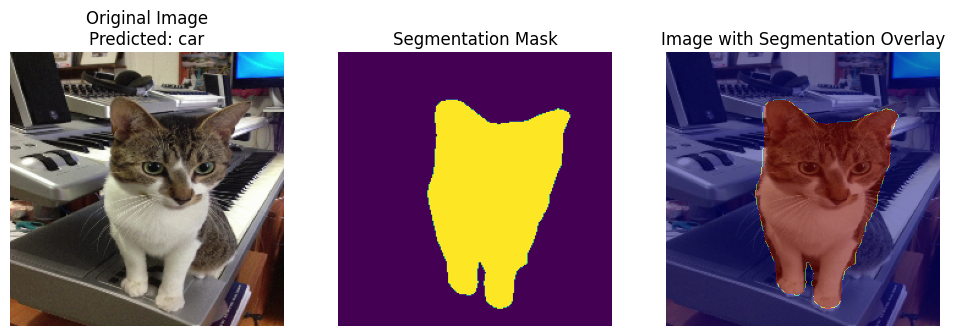

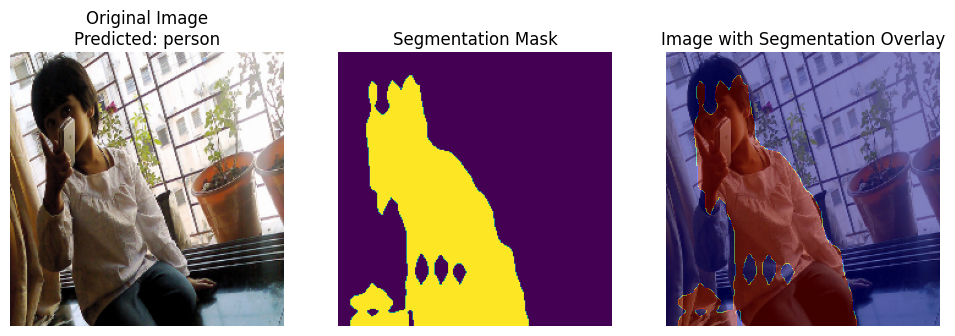

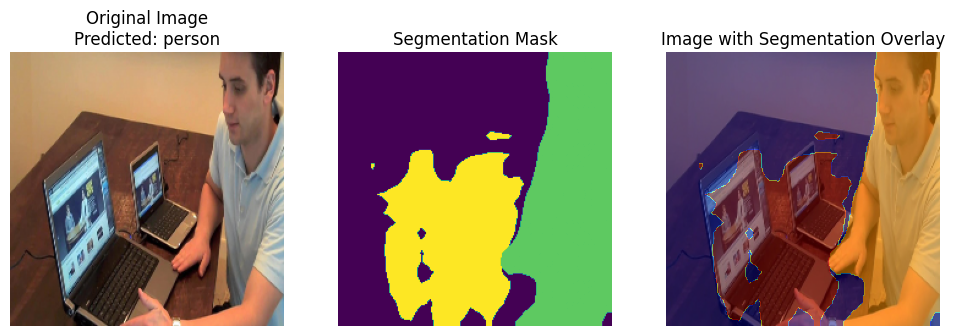

In [53]:
# Get user input for three images
image_paths = []
for i in range(3):
    image_path = input(f"Enter the path to image {i+1}: ")
    image_paths.append(image_path)

# Make predictions and display images with segmentation masks
for image_path in image_paths:
    # Load and preprocess image
    img = data_prepare(image_path)

    # Make classification prediction
    resize_img = img.reshape(-1, 224, 224, 3)
    prediction = mobileNetModel.predict(resize_img, verbose=False)
    idx = np.argmax(prediction)
    predicted_label = ['person', 'car', 'dog', 'cake'][idx]

    # Get segmentation mask
    mask = get_segmentation_mask(img)

    # Define the desired figure size
    matplib.figure(figsize=(12, 6))

    # Display original image
    matplib.subplot(1, 3, 1)
    matplib.imshow(img)
    matplib.title(f"Original Image\nPredicted: {predicted_label}")
    matplib.axis('off')

    # Display segmentation mask
    matplib.subplot(1, 3, 2)
    matplib.imshow(mask)
    matplib.title("Segmentation Mask")
    matplib.axis('off')

    # Display overlay of segmentation mask on original image
    matplib.subplot(1, 3, 3)
    matplib.imshow(img)
    matplib.imshow(mask, cmap='jet', alpha=0.5)  # Overlay mask with some transparency
    matplib.title("Image with Segmentation Overlay")
    matplib.axis('off')

    # Show the plot
    matplib.show()

    # /content/imgdataset/test-30/000000001773.jpg
    # /content/imgdataset/test-30/000000001751.jpg
    # /content/imgdataset/test-30/000000001459.jpg



---



---



## Apply Adaptive Histogram Equalization (AHE)

In [54]:
import cv2
import os
from tqdm import tqdm

# Create an instance of CLAHE for Adaptive Histogram Equalization (AHE)
clahe = cv2.createCLAHE()

# Create empty lists to store images and corresponding labels
rmImgList1 = []
rmLabelsList1 = []

# Iterate through the indices using tqdm for progress tracking
for i in tqdm(range(len(rmImgData))):
    # Read, convert color space, and resize the image using OpenCV
    img1 = cv2.imread(rmImgData[i])
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img1 = cv2.resize(img1, (196, 196))

    # Apply AHE to the image
    lab_img = cv2.cvtColor(img1, cv2.COLOR_RGB2LAB)
    lab_planes = cv2.split(lab_img)

    # Convert the tuple to a list before applying CLAHE
    lab_planes = list(lab_planes)
    lab_planes[0] = clahe.apply(lab_planes[0])

    lab_img = cv2.merge(lab_planes)
    img1 = cv2.cvtColor(lab_img, cv2.COLOR_LAB2RGB)

    # Append the preprocessed image to the list of images
    rmImgList1.append(img1)

    # Map categories to numerical labels and append to the list of labels
    # Extract the category by taking the second-to-last element in the path
    category1 = rmImgData[i].split(os.path.sep)[-2]

    # Assign numerical labels based on the category
    if category1 == "person":
        label = 0
    elif category1 == "car":
        label = 1
    elif category1 == "dog":
        label = 2
    elif category1 == "cake":
        label = 3

    rmLabelsList1.append(label)


100%|██████████| 1040/1040 [00:05<00:00, 186.12it/s]


In [55]:
import numpy as np

# Convert lists to NumPy arrays
rmImgList1 = np.array(rmImgList1)
rmLabelsList1 = np.array(rmLabelsList1)


In [56]:
rmImgList1.shape

(1040, 196, 196, 3)

In [57]:
rmLabelsList1.shape

(1040,)

In [58]:
# Importing the TrainTestSplit func. separates data into trainmodel and testmodel sets.
from sklearn.model_selection import train_test_split

# Dividing data into training and testing phases so that our machine learning model may be trained and tested
trainXDatac, testXDatac, trainYDatac, testYDatac = train_test_split(rmImgList1, rmLabelsList1, test_size=0.5)


In [59]:
# Keras is used to import the to_categorical function for one hot encoding.
from tensorflow.keras.utils import to_categorical

# Convert the labels to categorical format
trainYDatac = to_categorical(trainYDatac, 4)
testYDatac = to_categorical(testYDatac, 4)


In [60]:
# Printed the-shapes of the trainingSet for - in-put data
print('trainXData shape:', trainXDatac.shape)

# Printed the shapes of the trainingSet for out-put labels
print('trainYData shape:', trainYDatac.shape)

# Printed the shapes of the tes-tingSet for in-put data
print('testXData shape:', testXDatac.shape)

# Printed the shape of the tes-ting set for out-put labels
print('testYData shape:', testYDatac.shape)

trainXData shape: (520, 196, 196, 3)
trainYData shape: (520, 4)
testXData shape: (520, 196, 196, 3)
testYData shape: (520, 4)


# **Implementation of mobileNetModel Model**

In [61]:
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import MobileNet  # Change to MobileNet


# Import Adam optimizer
from keras.optimizers import Adam

In [62]:
# Load MobileNet model pre-trained on ImageNet and exclude top layers
mobileNetModelc = MobileNet(include_top=False, weights="imagenet", input_shape=(196, 196, 3))
mobileNetModelc.trainable = False


In [63]:
# Add global average pooling layer
xc = mobileNetModelc.output
xc = tf.keras.layers.GlobalAveragePooling2D()(xc)


In [64]:
# Add fully connected layer with 4 outputs (for 4 classes)
xc = tf.keras.layers.Dense(4, activation='softmax')(xc)

In [65]:
# Create the model
mobileNetModelc = tf.keras.models.Model(inputs=mobileNetModelc.input, outputs=xc)

# Print the model summary
mobileNetModelc.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 196, 196, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 98, 98, 32)        864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 98, 98, 32)        128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 98, 98, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 98, 98, 32)        288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 98, 98, 32)        128 

In [66]:
# Set hyperparameters for training
lr = 0.0001  # Learning rate
epochs = 20  # Number of training epochs
batch_size = 32  # Batch size for training
ls_fun = 'categorical_crossentropy'  # Loss function for categorical classification


In [67]:
# Build the model using the given loss, optimizer, and metrics
mobileNetModelc.compile(loss=ls_fun,  # The loss function for categorical cross-entropy in multiclass classification
              optimizer=Adam(learning_rate=lr),  # Adam optimizer with specified learning rate
              metrics=['accuracy'])  # Monitor accuracy during training


In [68]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation configuration
train_datagen = ImageDataGenerator(
    width_shift_range=0.2,  # Shift width by a fraction of total width
    height_shift_range=0.2,  # Shift height by a fraction of total height
    shear_range=0.2,  # Shear intensity
    zoom_range=0.2,  # Zoom range
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Strategy to fill in newly created pixels
)

# Test data should not be augmented
test_datagen = ImageDataGenerator()

# Applying data augmentation to the training set
train_generator = train_datagen.flow(trainXDatac, trainYDatac, batch_size=batch_size)

# No augmentation for the test set
test_generator = test_datagen.flow(testXDatac, testYDatac)


In [69]:

# Train the model and store training records for future reference
history_modelc = mobileNetModelc.fit(
    train_generator,  # Training data generator
    epochs=epochs,  # Number of epochs for training
    batch_size=batch_size,  # Batch size for each training iteration
    validation_data=test_generator  # Validation data generator
)

Epoch 1/20
17/17 [==============================] - 7s 292ms/step - loss: 1.1769 - accuracy: 0.4519 - val_loss: 0.9738 - val_accuracy: 0.5038
Epoch 2/20
17/17 [==============================] - 5s 290ms/step - loss: 0.9660 - accuracy: 0.4769 - val_loss: 0.9188 - val_accuracy: 0.4923
Epoch 3/20
17/17 [==============================] - 6s 344ms/step - loss: 0.9099 - accuracy: 0.4731 - val_loss: 0.9057 - val_accuracy: 0.4923
Epoch 4/20
17/17 [==============================] - 5s 273ms/step - loss: 0.8935 - accuracy: 0.4885 - val_loss: 0.8984 - val_accuracy: 0.4865
Epoch 5/20
17/17 [==============================] - 6s 361ms/step - loss: 0.8972 - accuracy: 0.4865 - val_loss: 0.8914 - val_accuracy: 0.4923
Epoch 6/20
17/17 [==============================] - 5s 273ms/step - loss: 0.8957 - accuracy: 0.4750 - val_loss: 0.8871 - val_accuracy: 0.4923
Epoch 7/20
17/17 [==============================] - 7s 400ms/step - loss: 0.8835 - accuracy: 0.5000 - val_loss: 0.8857 - val_accuracy: 0.4827
Epoch 

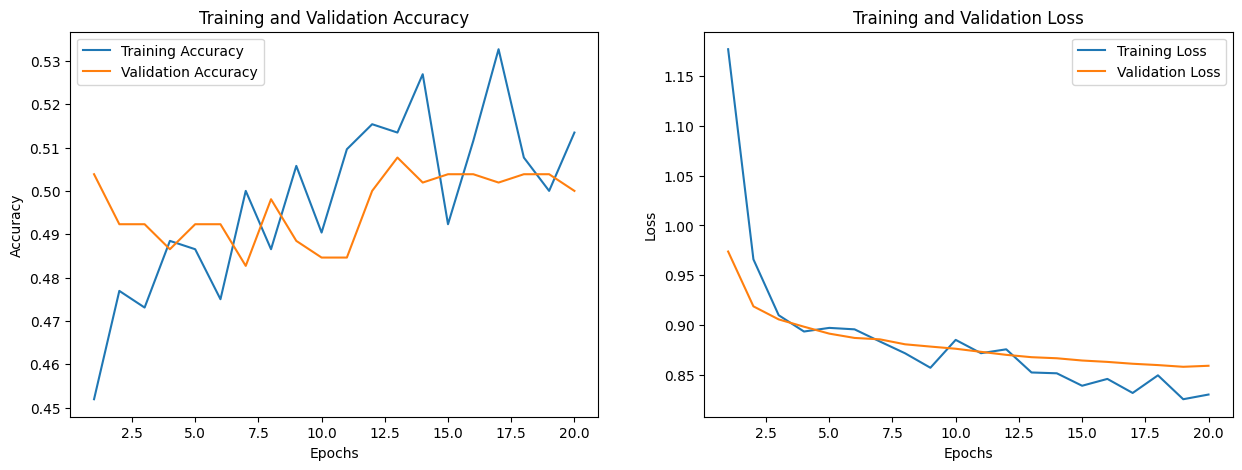

In [70]:
# Extracting training and validation accuracy and loss values from the history object
train_accuracy = history_modelc.history['accuracy']
val_accuracy = history_modelc.history['val_accuracy']
train_loss = history_modelc.history['loss']
val_loss = history_modelc.history['val_loss']

# Defining the number of epochs
epochs = range(1, len(train_accuracy) + 1)

# Creating a figure with two subplots to visualize accuracy and loss
fig, (ax1, ax2) = matplib.subplots(1, 2, figsize=(15, 5))

# Plotting training and validation accuracy on the first subplot
ax1.plot(epochs, train_accuracy, label='Training Accuracy')
ax1.plot(epochs, val_accuracy, label='Validation Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plotting training and validation loss on the second subplot
ax2.plot(epochs, train_loss, label='Training Loss')
ax2.plot(epochs, val_loss, label='Validation Loss')
ax2.set_title('Training and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

# Displaying the plot
matplib.show()


### **Model Training Evaluation**

In [71]:
# Calculate and print accuracy, recall, precision, and F1 score of the training data

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Predict labels using the trained model on the training data
yPredc = mobileNetModelc.predict(trainXDatac)
yPredc = np.argmax(yPredc, axis=1)
yTruec = np.argmax(trainYDatac, axis=1)

# Calculate accuracy
accuracyc = accuracy_score(yTruec, yPredc)

# Calculate recall
recallc = recall_score(yTruec, yPredc, average='macro')

# Calculate precision
precisionc = precision_score(yTruec, yPredc, average='macro')

# Calculate F1 score
f1_scorec = f1_score(yTruec, yPredc, average='macro')

# Print the calculated metrics
print("Training Accuracy:", accuracyc)
print("Training Recall:", recallc)
print("Training Precision:", precisionc)
print("Training F1 Score:", f1_scorec)


17/17 [==============================] - 1s 27ms/step
Training Accuracy: 0.4807692307692308
Training Recall: 0.24791472144413323
Training Precision: 0.2423996635424177
Training F1 Score: 0.24300219746912177


In [72]:
# Calculating and printing the classification report to evaluate model performance.

# Importing the necessary library
from sklearn.metrics import classification_report

# Generating the classification report
# Here, 'yTruec' represents the true labels and 'yPredc' represents the predicted labels.
# 'target_names' provides labels for each class for better interpretation of the report.
clsReportc = classification_report(yTruec, yPredc, target_names=['person', 'car', 'dog', 'cake'])

# Printing the classification report
print(clsReportc)


              precision    recall  f1-score   support

      person       0.52      0.44      0.47       270
         car       0.45      0.55      0.50       238
         dog       0.00      0.00      0.00         9
        cake       0.00      0.00      0.00         3

    accuracy                           0.48       520
   macro avg       0.24      0.25      0.24       520
weighted avg       0.48      0.48      0.47       520



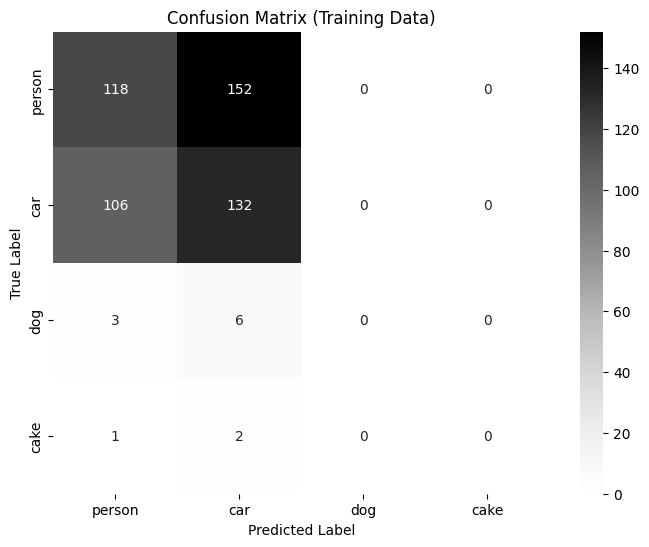

In [73]:
# Importing necessary libraries for confusion matrix plotting
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a confusion matrix
confusion_matrix_train = confusion_matrix(yTruec, yPredc)

# Defining class labels
class_labels = ['person', 'car', 'dog', 'cake']

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_train, annot=True, fmt="d", cmap="Greys", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Training Data)")
plt.show()


17/17 [==============================] - 0s 27ms/step


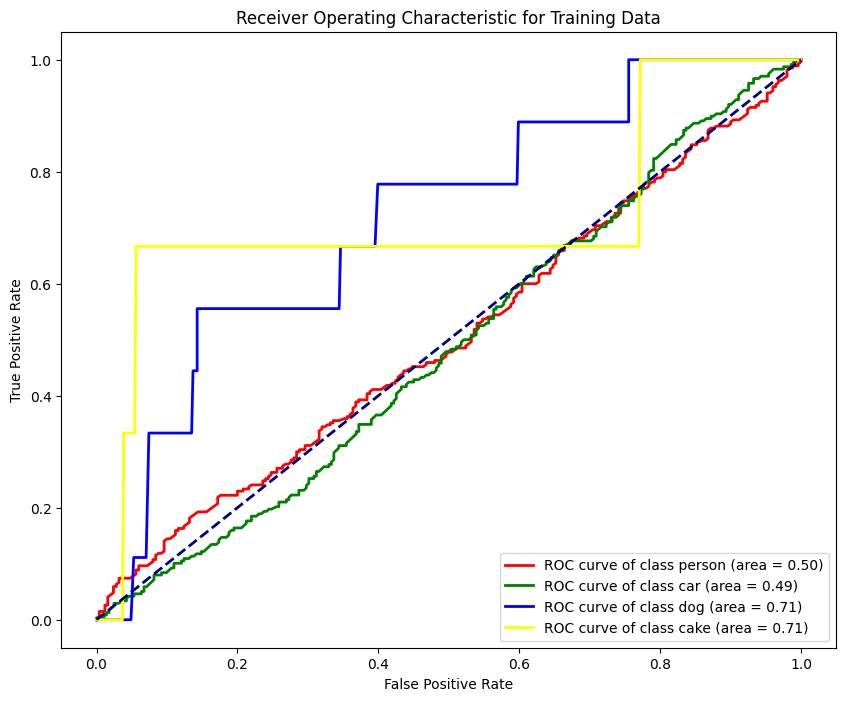

In [74]:
# Calculate the area under the ROC curve (AUC) for each class on the training data
classLabels = ['person', 'car', 'dog', 'cake']
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for each class
yPredProbc = mobileNetModelc.predict(trainXDatac)

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
rocAuc = dict()
nClasses = 4
for i in range(nClasses):
    fpr[i], tpr[i], _ = roc_curve(trainYDatac[:, i], yPredProbc[:, i])
    rocAuc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
colors = ['red', 'green', 'blue', 'yellow']
lw = 2
plt.figure(figsize=(10, 8))
for i, color in zip(range(nClasses), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(classLabels[i], rocAuc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc="lower right")
plt.show()


### **Model Testing Evaluate**

In [75]:
# Evaluate the performance of the loaded model on the test dataset.
# Here, we assess the accuracy using the test dataset.
valAccuracyRmc = mobileNetModelc.evaluate(testXDatac, testYDatac, verbose=1)


17/17 [==============================] - 1s 28ms/step - loss: 0.8591 - accuracy: 0.5000


In [76]:
# Make predictions using the trained model on the test dataset.
testPredRmc = mobileNetModelc.predict(testXDatac)

# Extract predicted labels by finding the index of the maximum value in each prediction array.
yPredTestRmc = np.argmax(testPredRmc, axis=1)

# Extract true labels by finding the index of the maximum value in each true label array.
yTrueTestRmc = np.argmax(testYDatac, axis=1)


17/17 [==============================] - 0s 26ms/step


In [77]:
# Importing necessary metrics for evaluating classification models.
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Importing functions for studying precision-recall curves.
from sklearn.metrics import precision_recall_curve, auc

# Importing functions for ROC curve analysis.
from sklearn.metrics import roc_curve, auc

In [78]:
# Precision score of the trained model on the test dataset.
precisionTestRmc = precision_score(yTrueTestRmc, yPredTestRmc, average='weighted')

# Recall score of the trained model on the test dataset.
recallTestRmc = recall_score(yTrueTestRmc, yPredTestRmc, average='weighted')

# F1 score of the trained model on the test dataset.
f1TestRmc = f1_score(yTrueTestRmc, yPredTestRmc, average='weighted')

In [79]:
# Outputting the accuracy of the model on the test dataset.
print("Testing Accuracy  : %.4f" % valAccuracyRmc[1])

# Printing the precision score of the trained model.
print("Precision Score   : %.4f" % precisionTestRmc)

# Outputting the recall score of the trained model.
print("Recall Score      : %.4f" % recallTestRmc)

# Calculating and printing the F1 score of the trained model.
print("F1 Score          : %.4f" % f1TestRmc)

Testing Accuracy  : 0.5000
Precision Score   : 0.4888
Recall Score      : 0.5000
F1 Score          : 0.4943


In [80]:
# Creating a list of labels.
labels = ['car', 'person', 'dog', 'cake']

In [81]:
# Generating a classification report for the trained model.
print(classification_report(yTrueTestRmc, yPredTestRmc, target_names=labels))

              precision    recall  f1-score   support

         car       0.44      0.46      0.45       227
      person       0.55      0.56      0.55       281
         dog       0.00      0.00      0.00        10
        cake       0.00      0.00      0.00         2

    accuracy                           0.50       520
   macro avg       0.25      0.25      0.25       520
weighted avg       0.49      0.50      0.49       520



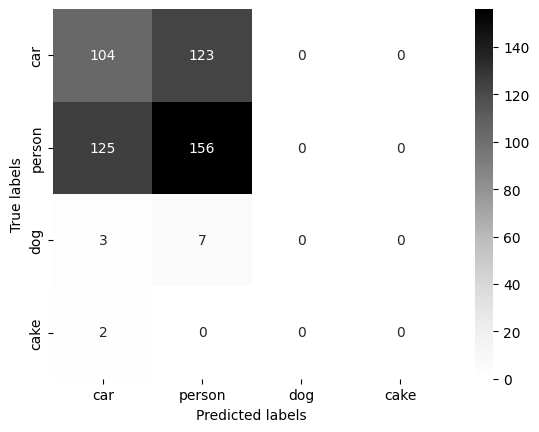

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix
cmTestc = confusion_matrix(yTrueTestRmc, yPredTestRmc)

# Set up the plot
ax = plt.subplot()

# Plot the confusion matrix using seaborn with annotations
sns.heatmap(cmTestc, annot=True, ax=ax, cmap='Greys', fmt='d')

# Set labels for the axes
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

# Set tick labels for x and y axes
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# Show the plot
plt.show()

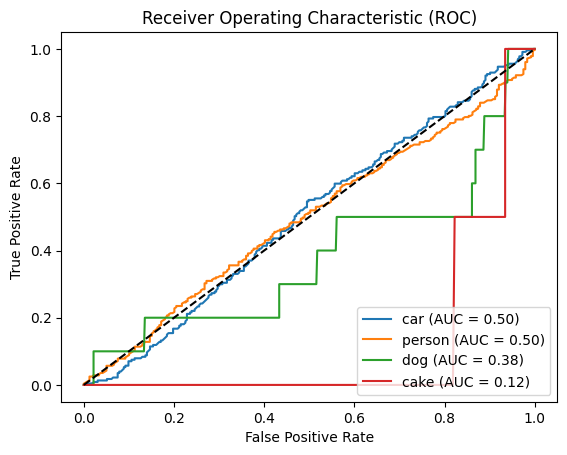

In [83]:
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(labels)):
    fpr[i], tpr[i], _ = roc_curve(testYDatac[:, i], testPredRmc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure()
for i in range(len(labels)):
    plt.plot(fpr[i], tpr[i], label=f"{labels[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


### **Image Segmentation after Data Augmentaion with CLAHE**



In [84]:
def data_preparec(imagePath):

    # Read-the-image-using-OpenCV
    imgc = cv2.imread(imagePath)

    # Convert-the-color-space-from-BGR-to-RGB
    imgc = cv2.cvtColor(imgc, cv2.COLOR_BGR2RGB)

    # Resize-the-image-to-the-required-inmpyut-size-of-the-model-(196x196)
    imgc = cv2.resize(imgc, (224, 224))

    return imgc

In [85]:
import os
import cv2
import torch
import torchvision
from pathlib import Path
from tqdm import tqdm
from torchvision.transforms import functional as F

# Load a pre-trained DeepLabV3 model
segmentation_model = torchvision.models.segmentation.fcn_resnet50(pretrained=True)
segmentation_model.eval()

# Device configuration
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
segmentation_model.to(device)

# Function to apply segmentation
def get_segmentation_mask(image):
    """
    Apply semantic segmentation to the input image and return the segmentation mask.

    Args:
        image (PIL Image): Input image.

    Returns:
        numpy.ndarray: Segmentation mask.
    """
    image_tensor = F.to_tensor(image).unsqueeze(0).to(device)
    with torch.no_grad():
        prediction = segmentation_model(image_tensor)['out']
    masks = prediction.squeeze(0).argmax(0).byte().cpu().numpy()
    return masks


Enter the path to image 1: /content/imgdataset/test-30/000000001411.jpg
Enter the path to image 2: /content/imgdataset/test-30/000000001492.jpg
Enter the path to image 3: /content/imgdataset/test-30/000000001551.jpg


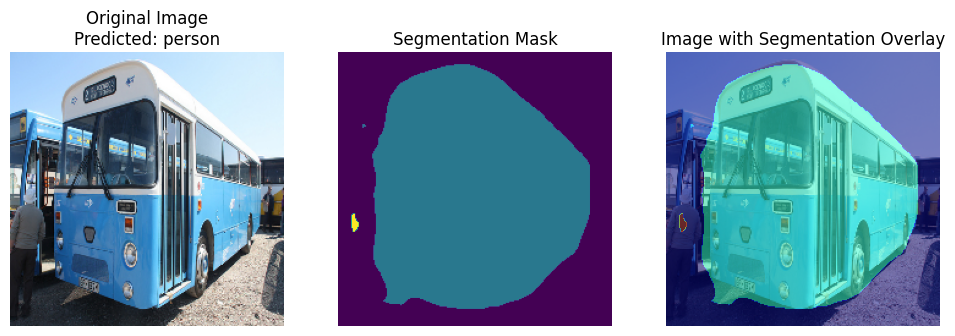

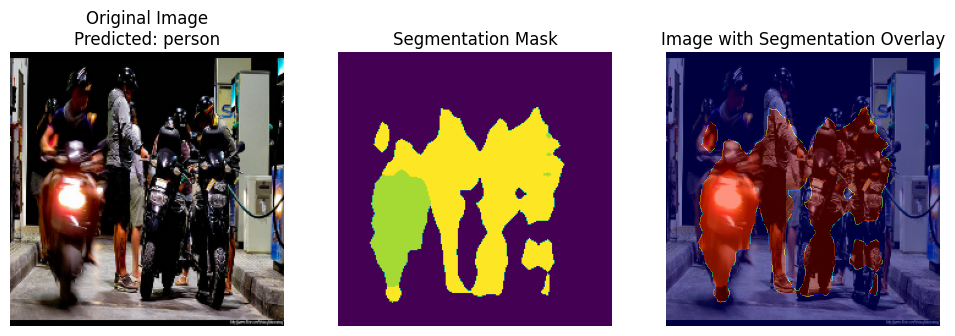

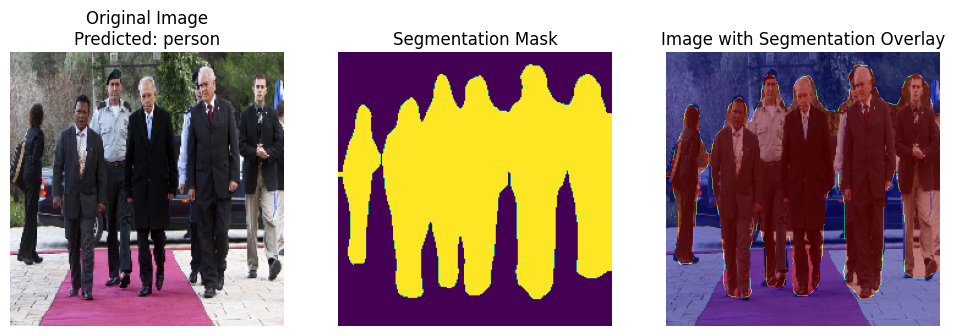

In [86]:
# Get user input for three images
image_paths = []
for i in range(3):
    image_path = input(f"Enter the path to image {i+1}: ")
    image_paths.append(image_path)

# Make predictions and display images with segmentation masks
for image_path in image_paths:
    # Load and preprocess image
    img = data_preparec(image_path)  # Assuming a function named preprocess_image is used for data preparation

    # Make classification prediction
    resize_img = img.reshape(-1, 224, 224, 3)
    prediction = mobileNetModel.predict(resize_img, verbose=False)
    idx = np.argmax(prediction)
    predicted_label = ['person', 'car', 'dog', 'cake'][idx]

    # Get segmentation mask
    mask = get_segmentation_mask(img)  # Assuming a function named get_segmentation_mask is used

    # Define the desired figure size
    plt.figure(figsize=(12, 6))  # Matplotlib abbreviation changed to plt

    # Display original image
    plt.subplot(1, 3, 1)  # Abbreviated plt
    plt.imshow(img)
    plt.title(f"Original Image\nPredicted: {predicted_label}")
    plt.axis('off')

    # Display segmentation mask
    plt.subplot(1, 3, 2)  # Abbreviated plt
    plt.imshow(mask)
    plt.title("Segmentation Mask")
    plt.axis('off')

    # Display overlay of segmentation mask on original image
    plt.subplot(1, 3, 3)  # Abbreviated plt
    plt.imshow(img)
    plt.imshow(mask, cmap='jet', alpha=0.5)  # Overlay mask with some transparency
    plt.title("Image with Segmentation Overlay")
    plt.axis('off')

    plt.show()  # Abbreviated plt


    # /content/imgdataset/test-30/000000001411.jpg
    # /content/imgdataset/test-30/000000001492.jpg
    # /content/imgdataset/test-30/000000001551.jpg